## Portfolio Optimization -- A Quadratic Programming Example

Suppose you are given a set of assets with the option to invest a total of a dollar across all assets. You know the rate of return of each asset as well as the covariance of every pair of assets. How should you invest a dollar?

First, let's graph the rate of return of each asset:

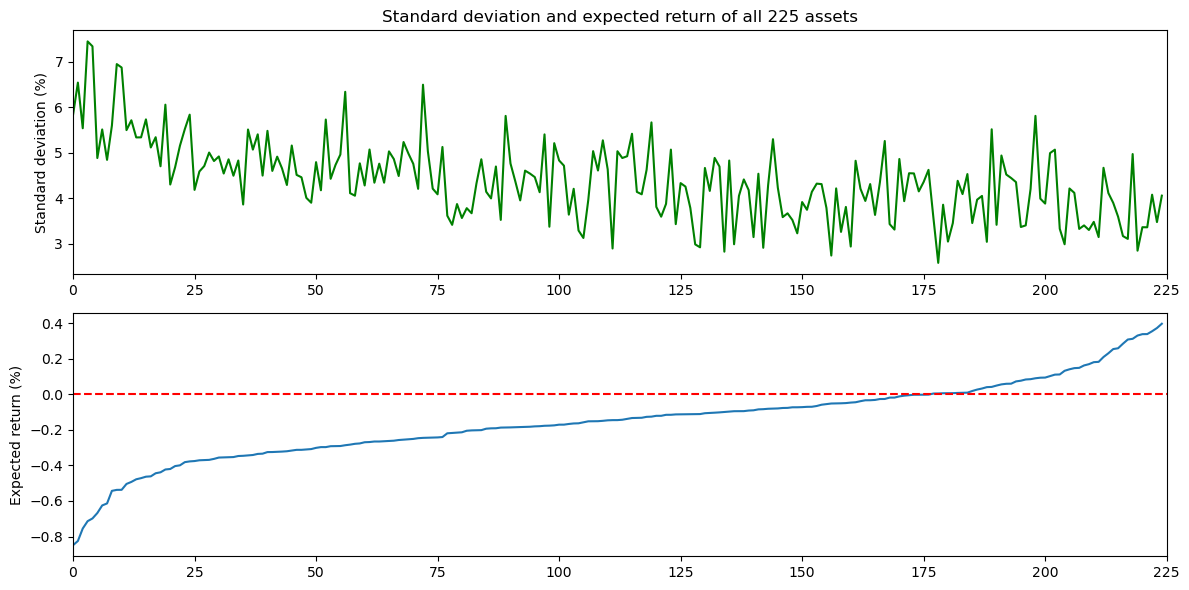

In [1]:
using DataFrames, CSV, LinearAlgebra

df = CSV.read("folio_mean.csv", DataFrame, header=false, delim=',')
r = 100 .*df # expected return (in percent)

df2 = CSV.read("folio_cov.csv", DataFrame, header=false, delim=',')
Σ = 10000 .*Matrix(df2)# Expected variance (in percent squared)
ix = sortperm(r); # sort the assets by expected return (this sorts the INDICES)

# plot the rates of return and standard deviation of each of the 225 assets
using PyPlot
fig = figure(figsize=(12,6))

subplot(211)
xlim(0,225)
plot(sqrt.(diag(Σ))[ix],"g")
ylabel("Standard deviation (%)")
title("Standard deviation and expected return of all 225 assets")
tight_layout()

subplot(212)
xlim(0,225)
plot(Array(r)[ix])
plot([0,225], [0,0], "r--")
ylabel("Expected return (%)")
tight_layout()
;

In [2]:
df2

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.001436,0.00075516,0.00097682,0.00094026,0.00071266,0.00088806,0.0011486
2,0.00075516,0.0024736,0.00094702,0.00064131,0.00067212,0.00075551,0.0010845
3,0.00097682,0.00094702,0.0023346,0.0011876,0.00098473,0.0014437,0.001698
4,0.00094026,0.00064131,0.0011876,0.0018608,0.00080811,0.0010208,0.0012521
5,0.00071266,0.00067212,0.00098473,0.00080811,0.0012879,0.00097471,0.0010725
6,0.00088806,0.00075551,0.0014437,0.0010208,0.00097471,0.0020394,0.0016212
7,0.0011486,0.0010845,0.001698,0.0012521,0.0010725,0.0016212,0.0030062
8,0.00073058,0.00051414,0.0010586,0.00082563,0.00070537,0.00091377,0.0010215
9,0.0004907,0.00071876,0.00047306,0.00037418,0.0004497,0.00047169,0.00055775


In [7]:
r

,Column1
,Float64
1,-0.1117
2,0.3123
3,-0.3471
4,-0.0585
5,-0.0769
6,-0.3124
7,-0.325
8,-0.2174
9,0.373


In [5]:
ix

225-element Vector{Int64}:
  57
 136
 191
 181
 123
 102
 120
  78
  90
 141
 209
 112
 131
   ⋮
  79
 201
 188
 215
  40
   2
  62
 165
  43
 115
   9
 214

In [12]:
sqrt.(diag(Σ))
#sqrt.(diag(Σ))[57]

225-element Vector{Float64}:
 3.789459064299283
 4.973529933558257
 4.831769862069177
 4.313699108653732
 3.5887323667278395
 4.515971656244091
 5.482882453600478
 3.41935666463737
 3.479942528261063
 6.4957678529947485
 2.992991814222017
 4.710732427128503
 4.258990490714907
 ⋮
 4.060172410132358
 3.1731687632396737
 3.672465112155594
 4.88661436988842
 4.83135591733832
 5.340131084533413
 4.888762624632127
 3.6740985288911348
 4.213786895418419
 3.4573110938994196
 3.8612174245955124
 2.830600642973148

In [8]:
sqrt.(diag(Σ))[ix] # not sorted / ix is sorted by r.

225-element Vector{Float64}:
 5.830265860147374
 6.541865177455127
 5.53976533799041
 7.446274236153272
 7.33839219447966
 4.886205071423016
 5.513166059534213
 4.846441993875507
 5.6
 6.948021301061187
 6.872917866525105
 5.498999909074376
 5.714980314926728
 ⋮
 4.117644957982657
 3.902050742878673
 3.599166570193716
 3.1731687632396737
 3.111093055503162
 4.973529933558257
 2.852595309538316
 3.3677885919398203
 3.3657094348740206
 4.081053785482372
 3.479942528261063
 4.060172410132358

In [20]:
Array(r)[ix] # sorted in an ascending order (ix = sortperm(r))
#Array(r)[57]
#Array(r)[214]

225-element Vector{Float64}:
 -0.8489
 -0.8252
 -0.755
 -0.7137
 -0.6984
 -0.6679
 -0.6252
 -0.6139
 -0.5431
 -0.5376
 -0.5373
 -0.5042
 -0.4928
  ⋮
  0.2309
  0.2546
  0.2591
  0.2847
  0.30829999999999996
  0.31229999999999997
  0.3307
  0.3385
  0.33890000000000003
  0.3549
  0.373
  0.39709999999999995

We can also build a heatmap of the covariance of every pair of assets. Note the diagonal line showing covariance of each asset with itself.

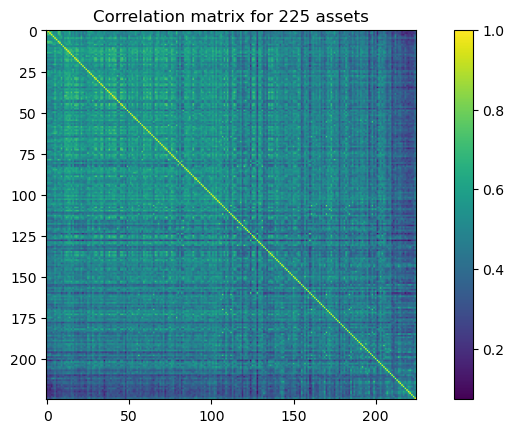

In [22]:
# plot correlation matrix (shows which assets are correlated with which other assets)
corr = diagm(diag(Σ).^(-1/2))*Σ*diagm(diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
title("Correlation matrix for 225 assets")
;

And plot each asset in terms of rate of return and variance:

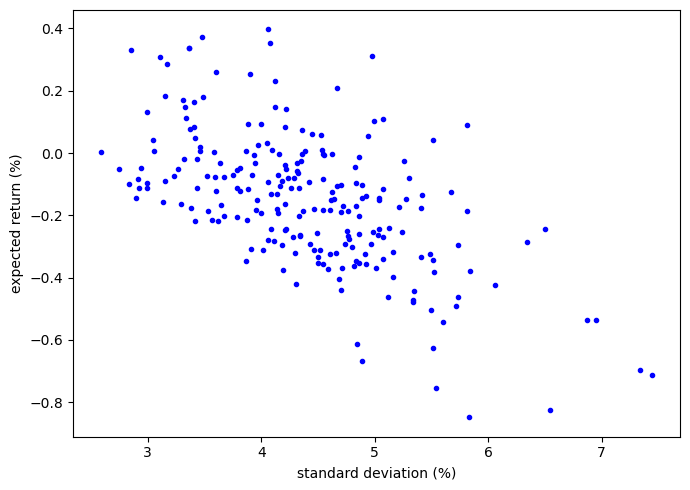

In [24]:
# plot each asset individually
figure(figsize=(7,5))
plot(sqrt.(diag(Σ)), Array(r), "b.")
xlabel("standard deviation (%)")
ylabel("expected return (%)")
tight_layout()

Finally, let's solve the problem:

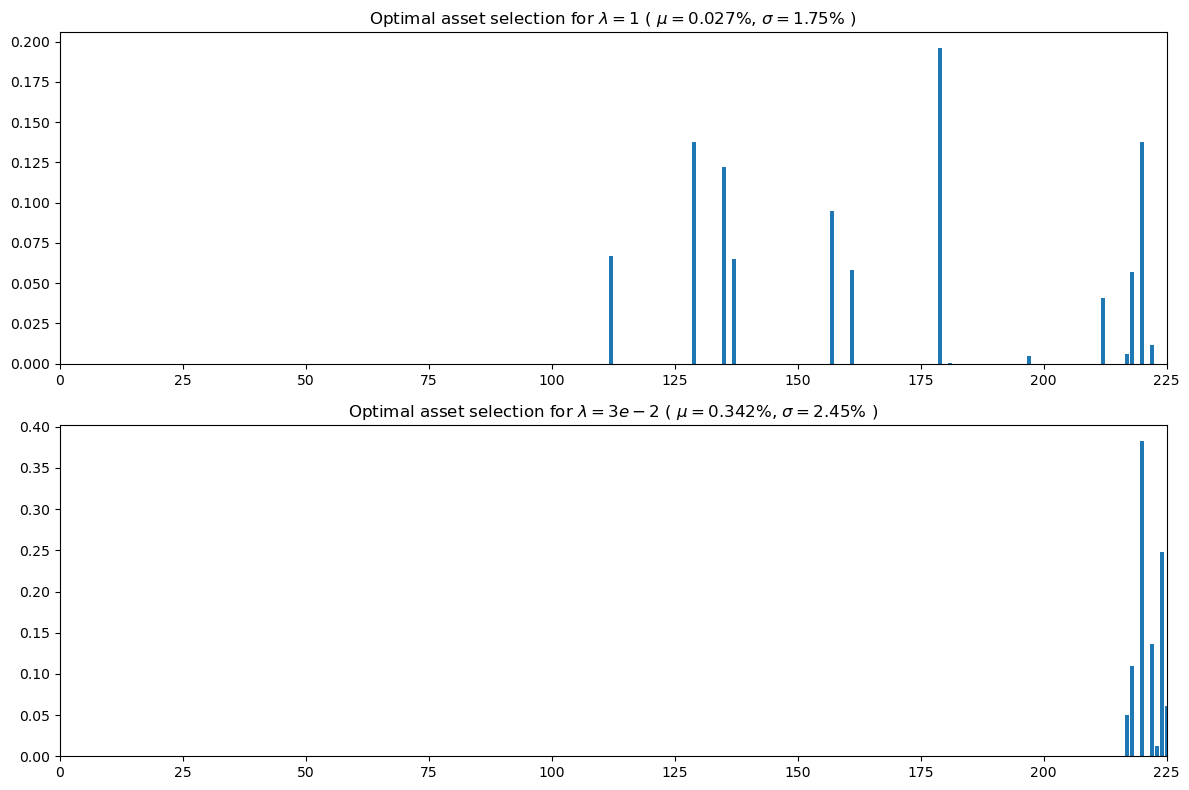

Academic license - for non-commercial use only - expires 2022-07-06


In [25]:
rr = Array(r) # for convenience, convert the dataframe r into an Array(rr)


using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag", 0)

@variable(m, x[1:225] >= 0)
@constraint(m, sum(x) == 1)

figure(figsize=(12,8))

subplot(211)

λ = 1 # more weight on risk

@objective(m, Min, -dot(rr,x) + λ*dot(x,Σ*x))
optimize!(m)

xsol = value.(x)
ix1 = findall(xsol .> 1e-4) # put all xs with positive value
ret = dot(rr,xsol) # calculate rate of return
std = sqrt(dot(xsol,Σ*xsol)) # calculate covariance
xlim(0,225)
bar(1:225,xsol[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)

λ = 3e-2 # more weight on return

@objective(m, Min, -dot(rr,x) + λ*dot(x,Σ*x))
optimize!(m)
xsol = value.(x)
ix2 = findall(xsol .> 1e-4) # pull all xs with positive value
ret = dot(rr,xsol) # calculate rate of return
std = sqrt(dot(xsol,Σ*xsol)) # calculate covariance
xlim(0,225)
bar(1:225,xsol[ix])
title(string("Optimal asset selection for \$\\lambda=3e-2\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()

In [31]:
rr

225×1 Matrix{Float64}:
 -0.1117
  0.31229999999999997
 -0.3471
 -0.0585
 -0.07690000000000001
 -0.3124
 -0.325
 -0.2174
  0.373
 -0.245
 -0.095
 -0.37
 -0.1122
  ⋮
  0.39709999999999995
  0.2847
 -0.0763
 -0.14300000000000002
 -0.0973
 -0.47159999999999996
 -0.1033
 -0.203
 -0.2433
  0.0065
  0.006
 -0.09920000000000001

In [30]:
dot(rr,x)

-0.1117 x[1] + 0.31229999999999997 x[2] - 0.3471 x[3] - 0.0585 x[4] - 0.07690000000000001 x[5] - 0.3124 x[6] - 0.325 x[7] - 0.2174 x[8] + 0.373 x[9] - 0.245 x[10] - 0.095 x[11] - 0.37 x[12] - 0.1122 x[13] - 0.2441 x[14] - 0.1706 x[15] - 0.4615 x[16] - 0.3774 x[17] - 0.0704 x[18] - 0.1872 x[19] - 0.35469999999999996 x[20] - 0.19090000000000001 x[21] - 0.1519 x[22] - 0.17700000000000002 x[23] - 0.297 x[24] - 0.2909 x[25] - 0.09129999999999999 x[26] - 0.3166 x[27] - 0.1573 x[28] - 0.4037 x[29] - 0.2049 x[30] - 0.1934 x[31] - 0.0024000000000000002 x[32] - 0.26849999999999996 x[33] - 0.0048000000000000004 x[34] + 0.0078 x[35] + 0.0727 x[36] - 0.0184 x[37] + 0.026699999999999998 x[38] - 0.1631 x[39] + 0.30829999999999996 x[40] - 0.0721 x[41] - 0.0505 x[42] + 0.33890000000000003 x[43] - 0.36879999999999996 x[44] - 0.2193 x[45] - 0.12669999999999998 x[46] - 0.1512 x[47] - 0.0185 x[48] - 0.2784 x[49] + 0.0599 x[50] - 0.1045 x[51] - 0.18680000000000002 x[52] - 0.263 x[53] - 0.3235 x[54] - 0.4201

In [33]:
λ = 3e-2
λ*dot(x,Σ*x)

0.43079999999999996 x[1]² + 0.45309599999999994 x[2]*x[1] + 0.586092 x[3]*x[1] + 0.5641560000000001 x[4]*x[1] + 0.42759600000000003 x[5]*x[1] + 0.532836 x[6]*x[1] + 0.68916 x[7]*x[1] + 0.43834799999999996 x[8]*x[1] + 0.29441999999999996 x[9]*x[1] + 0.74502 x[10]*x[1] + 0.343236 x[11]*x[1] + 0.5019659999999999 x[12]*x[1] + 0.546072 x[13]*x[1] + 0.63648 x[14]*x[1] + 0.63 x[15]*x[1] + 0.6428399999999999 x[16]*x[1] + 0.66756 x[17]*x[1] + 0.450822 x[18]*x[1] + 0.427932 x[19]*x[1] + 0.593934 x[20]*x[1] + 0.6143399999999999 x[21]*x[1] + 0.586002 x[22]*x[1] + 0.6381600000000001 x[23]*x[1] + 0.49337999999999993 x[24]*x[1] + 0.6294 x[25]*x[1] + 0.49162199999999995 x[26]*x[1] + 0.6503999999999999 x[27]*x[1] + 0.37751999999999997 x[28]*x[1] + 0.63672 x[29]*x[1] + 0.5178839999999999 x[30]*x[1] + 0.574128 x[31]*x[1] + 0.596256 x[32]*x[1] + 0.6446999999999999 x[33]*x[1] + 0.535434 x[34]*x[1] + 0.540564 x[35]*x[1] + 0.471558 x[36]*x[1] + 0.33163200000000004 x[37]*x[1] + 0.44577599999999995 x[38]*x[1] 

In [27]:
# compute optimal tradeoff curve (this may take a few seconds)
N = 50
ret = zeros(N)
sdev = zeros(N)
lambda_values = 10 .^(range(-3,stop=4,length=N))

for (i,λ) in enumerate(lambda_values)
    @objective(m, Min, -dot(rr,x) + λ*dot(x,Σ*x) )
    optimize!(m)
    xsol = value.(x)
    ret[i] = dot(rr,xsol)
    sdev[i] = sqrt(dot(xsol,Σ*xsol))
end

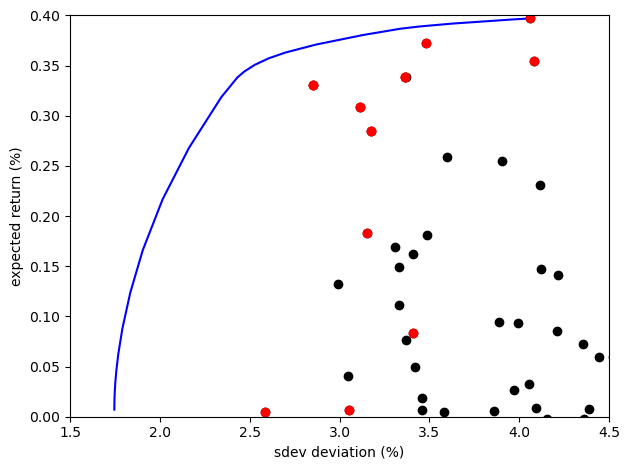

In [28]:
# plot tradeoff curve
plot(sdev,ret,"b-")
plot(sqrt.(diag(Σ)), rr, "k.", markersize=12)
plot(sqrt.(diag(Σ))[ix1], rr[ix1], "r.", markersize=12)  # low-risk portfolio
plot(sqrt.(diag(Σ))[ix2], rr[ix2], "r.", markersize=12)  # at the "elbow" of the curve
xlabel("sdev deviation (%)")
ylabel("expected return (%)")
axis([1.5,4.5,0,.4]);
tight_layout()